# Here I used a retinopathy dataset from kaggle to train a classification model to classify the image into one of the 5 classes namely:
### 1. No_DR
### 2. Mild
### 3. Moderate
### 4. Severe
### 5. Proliferative

#### The link to the dataset is: https://www.kaggle.com/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

In [95]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
import tensorflow.keras.layers as L

In [3]:
print("GPU done:",tf.test.gpu_device_name())

GPU done: /device:GPU:0


In [27]:
# You have to define you own directory path where you have downloaded the dataset.
train_dir = "gaussian_filtered_images/train/"
validation_dir = "gaussian_filtered_images/validation/"

In [28]:
arr1 = os.listdir(train_dir)
arr2 = os.listdir(validation_dir)

In [29]:
print(arr1)
print(arr2)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [24]:
def create_model():
    model = tf.keras.models.Sequential([])
    
    model.add(L.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)))
    model.add(L.MaxPooling2D((2,2)))
    model.add(L.BatchNormalization())
    
    model.add(L.Conv2D(64, (3,3), activation="relu"))
    model.add(L.MaxPooling2D((2,2)))
    model.add(L.BatchNormalization())
    
    model.add(L.Conv2D(128, (3,3), activation="relu"))
    model.add(L.MaxPooling2D((2,2)))
    model.add(L.BatchNormalization())
    
    model.add(L.Conv2D(256, (3,3), activation="relu"))
    model.add(L.MaxPooling2D((2,2)))
    model.add(L.BatchNormalization())
    
    model.add(L.Flatten())
    
    model.add(L.Dropout(0.4))
    model.add(L.Dense(256, activation="relu"))
    
    model.add(L.Dropout(0.3))
    model.add(L.Dense(128, activation="relu"))
    
    model.add(L.Dense(5, activation="softmax"))
    
    return model

In [54]:
my_model = create_model()

In [41]:
my_model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                 loss = "categorical_crossentropy",
                 metrics = ["accuracy"])

In [42]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 128)      

In [43]:
"""train_data = ImageDataGenerator(rescale=1./255,
                                zoom_range=0.1,
                                rotation_range=20,
                                shear_range=0.1,
                                height_shift_range=0.1,
                                width_shift_range=0.1,
                                horizontal_flip=True)
"""
train_data = ImageDataGenerator(rescale=1./255)
validation_data = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_data.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 shuffle=True,
                                                 class_mode="categorical")

validation_generator = validation_data.flow_from_directory(validation_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 shuffle=True,
                                                 class_mode="categorical")

Found 2486 images belonging to 5 classes.
Found 1176 images belonging to 5 classes.


In [45]:
history = my_model.fit(train_generator,
                       validation_data = validation_generator,
                       steps_per_epoch = 2486//32,
                       epochs=10,
                       verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 77 steps, validate for 37 steps
Epoch 1/10
77/77 [==============================] - 40s 515ms/step - loss: 1.0507 - accuracy: 0.6642 - val_loss: 2.0234 - val_accuracy: 0.0944
Epoch 2/10
77/77 [==============================] - 104s 1s/step - loss: 0.7653 - accuracy: 0.7217 - val_loss: 1.4861 - val_accuracy: 0.2551
Epoch 3/10
77/77 [==============================] - 102s 1s/step - loss: 0.6567 - accuracy: 0.7661 - val_loss: 1.7498 - val_accuracy: 0.0944
Epoch 4/10
77/77 [==============================] - 107s 1s/step - loss: 0.5962 - accuracy: 0.7775 - val_loss: 1.3382 - val_accuracy: 0.5349
Epoch 5/10
77/77 [==============================] - 116s 2s/step - loss: 0.4829 - accuracy: 0.8317 - val_loss: 1.2867 - val_accuracy: 0.5221
Epoch 6/10
77/77 [==============================] - 116s 2s/step - loss: 0.3783 - accuracy: 0.8553 - val_loss: 0.9998 - val_accuracy: 0.6139
Epoch 7/10
77/77 [==============================] - 116s 2s/

In [52]:
my_model.save("DR-1.h5")

In [47]:
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(train_acc))

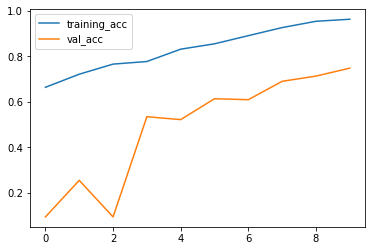

In [50]:
plt.plot(epochs, train_acc, label="training_acc")
plt.plot(epochs, val_acc, label="val_acc")
plt.legend()
plt.show()

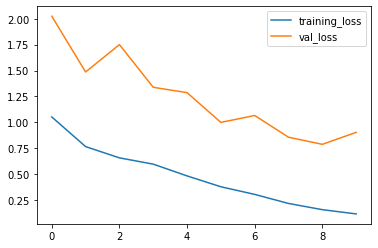

In [51]:
plt.plot(epochs, train_loss, label="training_loss")
plt.plot(epochs, val_loss, label="val_loss")
plt.legend()
plt.show()

In [53]:
history = my_model.fit(train_generator,
                       validation_data = validation_generator,
                       steps_per_epoch = 2486//32,
                       epochs=3,
                       verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 77 steps, validate for 37 steps
Epoch 1/3
77/77 [==============================] - 26s 335ms/step - loss: 0.0865 - accuracy: 0.9813 - val_loss: 0.9669 - val_accuracy: 0.7509
Epoch 2/3
77/77 [==============================] - 29s 381ms/step - loss: 0.0817 - accuracy: 0.9800 - val_loss: 1.1992 - val_accuracy: 0.7415
Epoch 3/3
77/77 [==============================] - 37s 475ms/step - loss: 0.0707 - accuracy: 0.9829 - val_loss: 1.0130 - val_accuracy: 0.7500


In [55]:
my_model.load_weights("DR-1.h5")

In [67]:
ans_list = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [172]:
def predict(pred, i):
    a = np.argmax(pred[i])
    print("Predicted class: " ,ans_list[a])

In [173]:
predict(pred, 0)

Predicted class:  Moderate


In [183]:
# Define your folder path that consists of images you need to test for looking the model performance. 
testing = "gaussian_filtered_images/test/"

In [211]:
test_data = ImageDataGenerator(rescale=1./255)
test_generator = test_data.flow_from_directory(testing,
                                               target_size=(224,224),
                                               shuffle=True,
                                               class_mode="categorical")

Found 30 images belonging to 1 classes.


In [212]:
x,y = test_generator.next()
pred = my_model.predict(x)

Predicted class:  Moderate


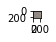

Predicted class:  No_DR


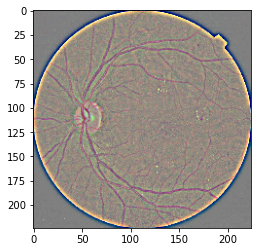

Predicted class:  Proliferate_DR


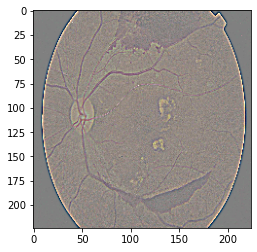

Predicted class:  Mild


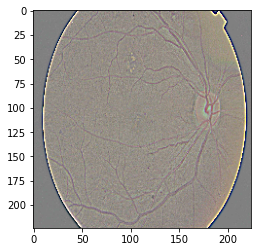

Predicted class:  No_DR


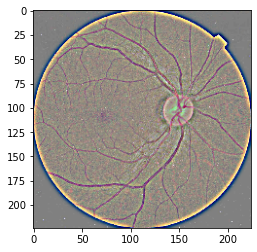

Predicted class:  Moderate


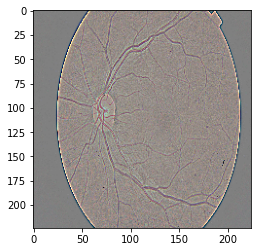

Predicted class:  Moderate


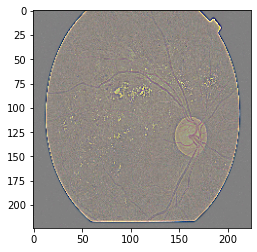

Predicted class:  No_DR


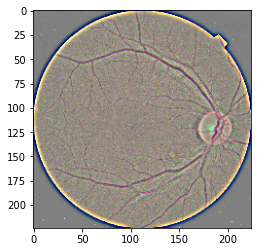

Predicted class:  Proliferate_DR


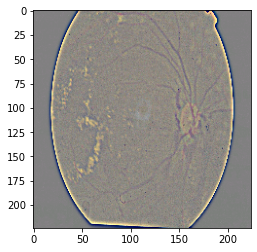

Predicted class:  No_DR


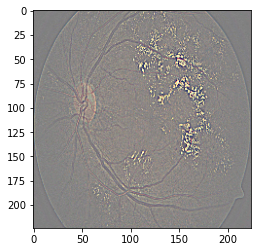

Predicted class:  Severe


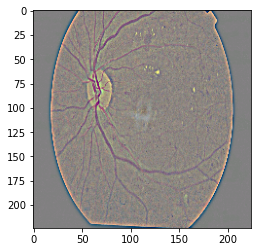

Predicted class:  Severe


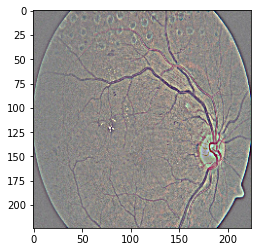

Predicted class:  Proliferate_DR


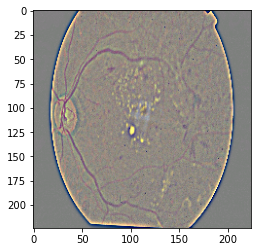

Predicted class:  Moderate


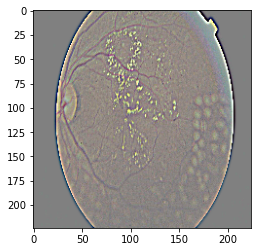

Predicted class:  Severe


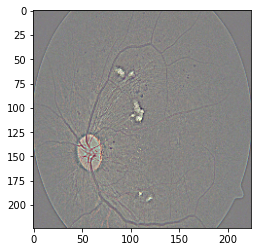

Predicted class:  Moderate


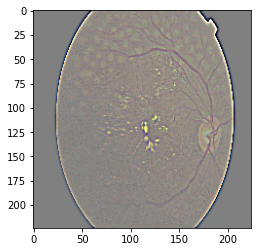

Predicted class:  Moderate


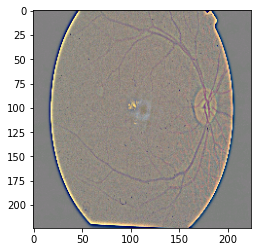

Predicted class:  No_DR


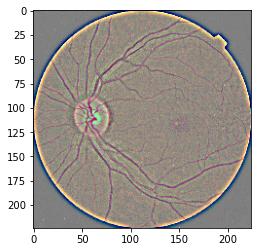

Predicted class:  No_DR


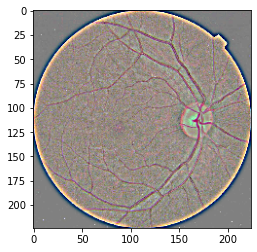

Predicted class:  No_DR


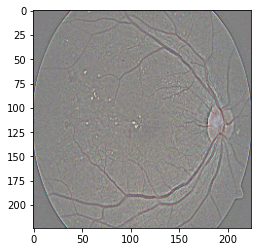

In [213]:
fig = plt.figure()
for i in range(10,len(pred)):
    fig.add_subplot(25,2,i+1)
    predict(pred, i)
    plt.imshow(x[i])
    plt.show()